In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Define the objective function
def objective_function(x):
    return (x - 2)**2

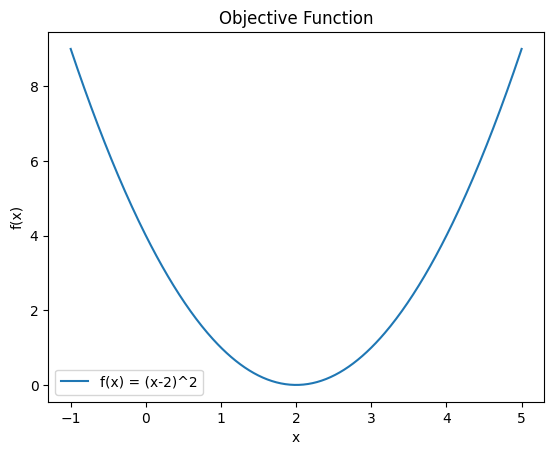

In [3]:
# Plot the function
x = np.linspace(-1, 5, 400)
y = objective_function(x)

plt.figure()
plt.plot(x, y, label='f(x) = (x-2)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective Function')
plt.legend()
plt.show()

In [4]:
# Define the gradient
def gradient(x):
    return 2 * (x - 2)

In [5]:
# gradient descent algorithm
def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    path = [(x, objective_function(x))]
    for i in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        path.append((x, objective_function(x)))
        print(f'Iteration {i+1}: x = {x}, f(x) = {objective_function(x)}')
    return x, path

In [6]:
# Run the optimization
initial_x = 0.0
learning_rate = 0.1
num_iterations = 100

min_x, path = gradient_descent(initial_x, learning_rate, num_iterations)

Iteration 1: x = 0.4, f(x) = 2.5600000000000005
Iteration 2: x = 0.7200000000000001, f(x) = 1.6383999999999994
Iteration 3: x = 0.976, f(x) = 1.048576
Iteration 4: x = 1.1808, f(x) = 0.6710886399999999
Iteration 5: x = 1.34464, f(x) = 0.4294967295999999
Iteration 6: x = 1.4757120000000001, f(x) = 0.2748779069439999
Iteration 7: x = 1.5805696, f(x) = 0.17592186044415997
Iteration 8: x = 1.66445568, f(x) = 0.11258999068426233
Iteration 9: x = 1.731564544, f(x) = 0.07205759403792791
Iteration 10: x = 1.7852516352, f(x) = 0.04611686018427385
Iteration 11: x = 1.8282013081600001, f(x) = 0.029514790517935232
Iteration 12: x = 1.862561046528, f(x) = 0.018889465931478572
Iteration 13: x = 1.8900488372224, f(x) = 0.012089258196146287
Iteration 14: x = 1.91203906977792, f(x) = 0.007737125245533639
Iteration 15: x = 1.9296312558223359, f(x) = 0.0049517601571415415
Iteration 16: x = 1.9437050046578688, f(x) = 0.0031691265005705763
Iteration 17: x = 1.954964003726295, f(x) = 0.002028240960365173
It

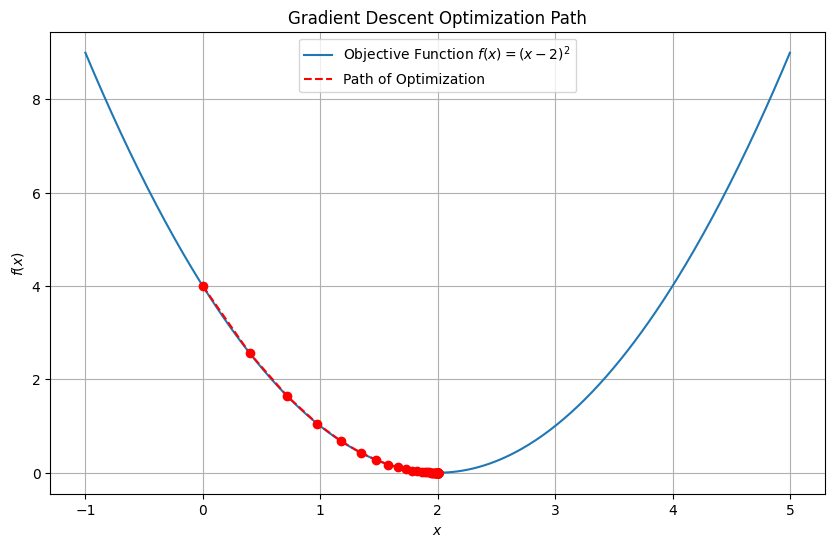

In [7]:
# Extract the x and y values from the path
x_values, y_values = zip(*path)

# Plot the objective function
x_plot = np.linspace(-1, 5, 400)
y_plot = objective_function(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Objective Function $f(x) = (x-2)^2$')
plt.scatter(x_values, y_values, color='red', zorder=5)
plt.plot(x_values, y_values, color='red', linestyle='dashed', zorder=5, label='Path of Optimization')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gradient Descent Optimization Path')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Scipy can do all this in one line
from scipy.optimize import minimize
result = minimize(objective_function, x0=0)
result.x

array([1.99999998])

In [9]:
def rosenbrock(params):
    x, y = params
    a = 1
    b = 100
    return (a - x)**2 + b * (y - x**2)**2

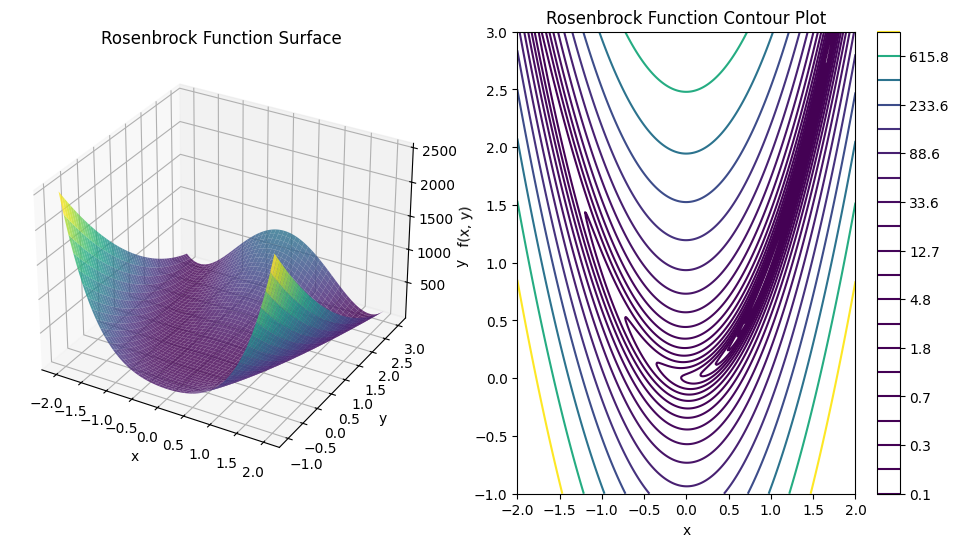

In [10]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])
fig = plt.figure(figsize=(12, 6))

# 3D surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Rosenbrock Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
ax2.set_title('Rosenbrock Function Contour Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.colorbar(contour)

plt.show()

In [11]:
# define the gradients 
def rosenbrock_gradient(params):
    x, y = params
    a = 1
    b = 100
    dfdx = -2*(a - x) - 4*b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])

In [12]:
# gradient descent algorithm
def gradient_descent_rosenbrock(initial_params, learning_rate, num_iterations):

    params = np.array(initial_params)
    path = [params] 
    for i in range(num_iterations):
        grad = rosenbrock_gradient(params)
        params = params - learning_rate * grad
        path.append(params)
    return params, path

In [13]:
# parameters
initial_point = [-1.5, 2.0]
learning_rate = 0.001
num_iterations = 20000

min_params, path = gradient_descent_rosenbrock(initial_point, learning_rate, num_iterations)

In [14]:
min_params

array([0.99982228, 0.99964389])

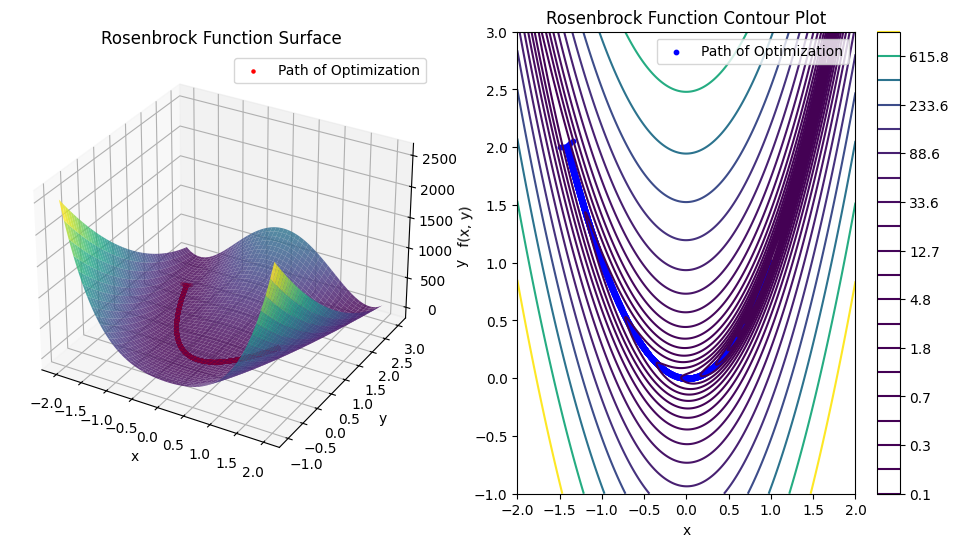

In [15]:
# Extract the x and y values from the path
path = np.array(path)
x_values = path[:, 0]
y_values = path[:, 1]

# Plot the Rosenbrock function and the optimization path
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig = plt.figure(figsize=(12, 6))

# 3D surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Rosenbrock Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.scatter(x_values, y_values, rosenbrock([x_values, y_values]), color='r', s=5, label='Path of Optimization')
ax.legend()

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
ax2.set_title('Rosenbrock Function Contour Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.scatter(x_values, y_values, color='b', s=10, label='Path of Optimization')
ax2.legend()
plt.colorbar(contour)

plt.show()

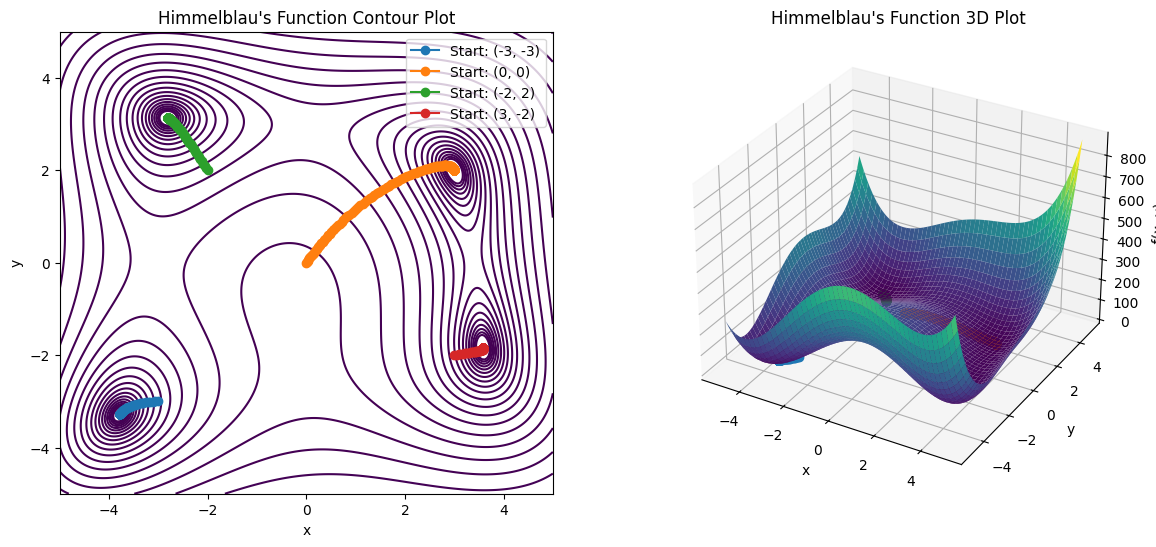

In [16]:
# Himmelblau's function
def himmelblau(X):
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gradient of the Himmelblau's function
def gradient_himmelblau(X):
    x, y = X
    dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dx, dy])

# Gradient descent algorithm
def gradient_descent(grad_func, start, lr=0.001, iterations=10000):
    path = [start]
    X = start
    for _ in range(iterations):
        grad = grad_func(X)
        X = X - lr * grad
        path.append(X)
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(path)

# Visualization of the Himmelblau's function
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

plt.figure(figsize=(14, 6))

# Contour plot
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
plt.title('Himmelblau\'s Function Contour Plot')
plt.xlabel('x')
plt.ylabel('y')

# Gradient descent paths
start_points = [(-3, -3), (0, 0), (-2, 2), (3, -2)]
paths = []
for start in start_points:
    path = gradient_descent(gradient_himmelblau, np.array(start), lr=0.001, iterations=10000)
    paths.append(path)
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f'Start: {start}')

plt.legend()

# 3D plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Plot the paths on the 3D surface
for path in paths:
    ax.plot(path[:, 0], path[:, 1], himmelblau(path.T), marker='o')

ax.set_title('Himmelblau\'s Function 3D Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

In [17]:
# Quaratic function
def quartic(x):
    return x**4 - 2*x**2 + x

In [18]:
def gradient_quartic(x):
    return 4*x**3 - 4*x + 1

In [19]:
def gradient_descent(grad_func, start, lr=0.001, iterations=10000):
    path = [start]
    x = start
    for _ in range(iterations):
        grad = grad_func(x)
        x = x - lr*grad
        path.append(x)
        if np.abs(grad) < 1e-6:
            break
    return np.array(path)

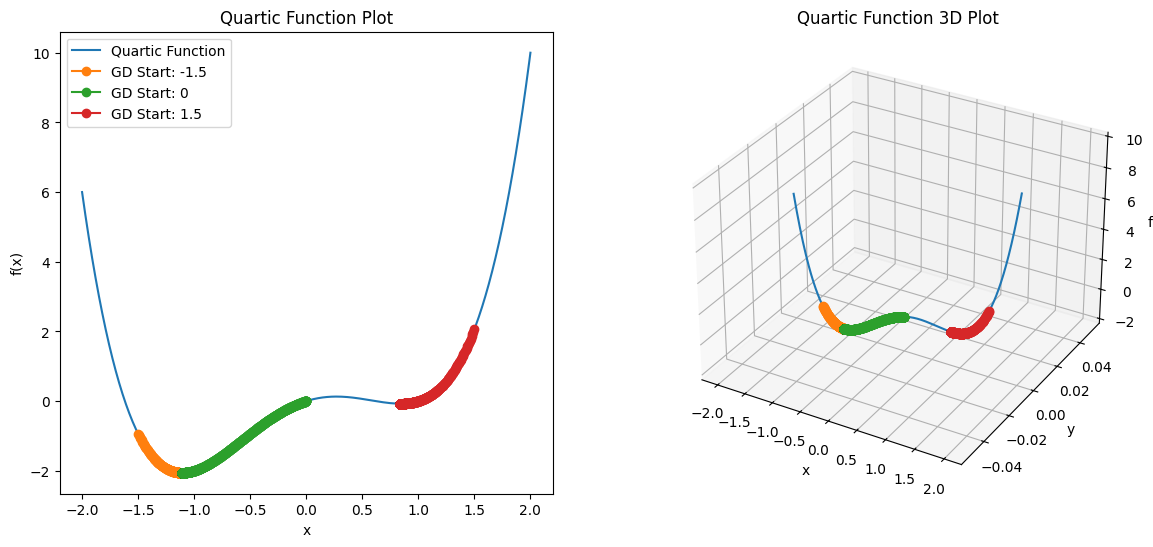

In [20]:
# Visualization of the Quartic function
x = np.linspace(-2, 2, 400)
y = quartic(x)

plt.figure(figsize=(14, 6))

# Plot the quartic function
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Quartic Function')
plt.title('Quartic Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')

# Optimization paths
start_points = [-1.5, 0, 1.5]
paths_gd = []
for start in start_points:
    path_gd = gradient_descent(gradient_quartic, start, lr=0.001, iterations=10000)
    paths_gd.append(path_gd)
    plt.plot(path_gd, quartic(path_gd), marker='o', label=f'GD Start: {start}')

plt.legend()

# 3D plot
ax = plt.subplot(1, 2, 2, projection='3d')
X = np.linspace(-2, 2, 400)
Y = quartic(X)
Z = np.zeros_like(X)

ax.plot(X, Z, Y, label='Quartic Function')

# Plot the paths on the 3D surface
for path in paths_gd:
    ax.plot(path, np.zeros_like(path), quartic(path), marker='o', label='GD Path')

ax.set_title('Quartic Function 3D Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x)')

plt.show()

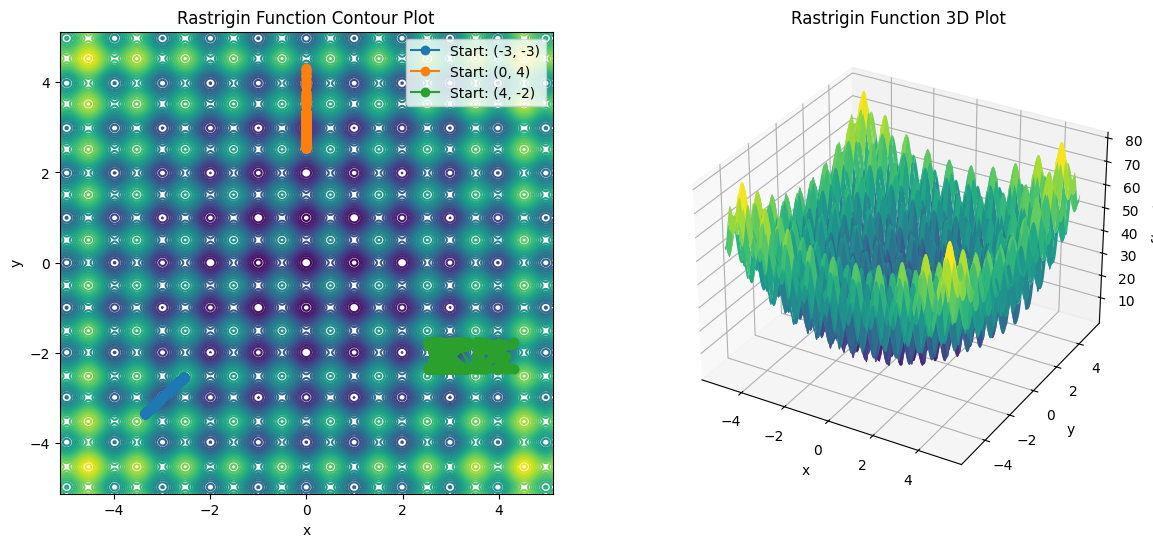

In [21]:
# Rastrigin function
def rastrigin(X):
    x, y = X
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

# Gradient of the Rastrigin function
def gradient_rastrigin(X):
    x, y = X
    dx = 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    dy = 2 * y + 20 * np.pi * np.sin(2 * np.pi * y)
    return np.array([dx, dy])

# Gradient descent algorithm
def gradient_descent(grad_func, start, lr=0.01, iterations=1000):
    path = [start]
    X = start
    for _ in range(iterations):
        grad = grad_func(X)
        X = X - lr * grad
        path.append(X)
    return np.array(path)

# Visualization of the Rastrigin function
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

plt.figure(figsize=(14, 6))

# Contour plot
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 50, cmap='viridis')
plt.title('Rastrigin Function Contour Plot')
plt.xlabel('x')
plt.ylabel('y')

# Gradient descent paths
start_points = [(-3, -3), (0, 4), (4, -2)]
for start in start_points:
    path = gradient_descent(gradient_rastrigin, np.array(start), lr=0.01, iterations=1000)
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f'Start: {start}')

plt.legend()

# 3D plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Rastrigin Function 3D Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

In [23]:
import xarray as xr
import pandas as pd

In [ ]:
file_path = 'C:/Users/Shubham/Desktop/PandasTutorial/interpolated_precip.nc'
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 5, lon: 8)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lat       (lat) float64 29.99 30.24 30.49 30.74 30.99
  * lon       (lon) float64 78.55 78.8 79.05 79.3 79.55 79.8 80.05 80.3
Data variables:
    precip    (datetime, lat, lon) float64 ...

In [ ]:
# Extract the time, latitude, and longitude coordinates
time = ds['datetime']
lat = ds['lat']
lon = ds['lon']

# Get the precipitation data for the first grid cell (first lat, first lon)
precip_first_grid = ds['precip'].isel(lat=0, lon=0)

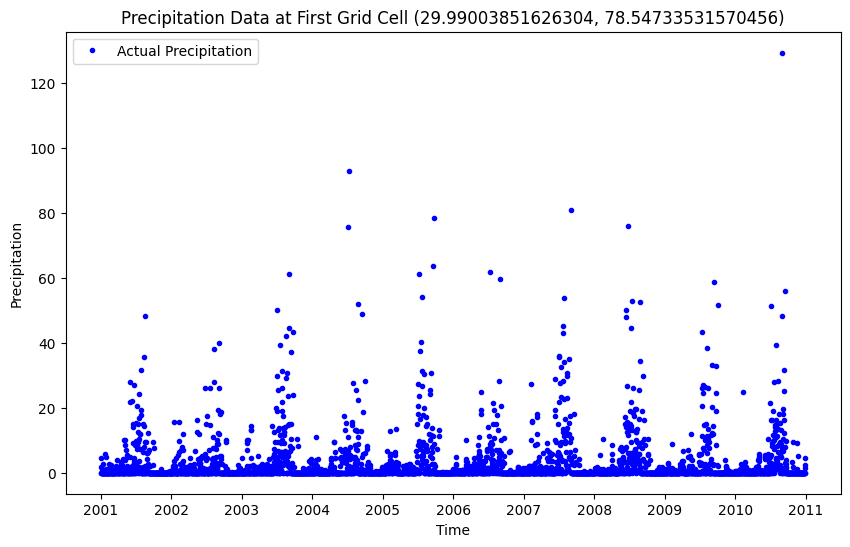

In [ ]:
# Plot the precipitation data over time for the first grid cell
plt.figure(figsize=(10, 6))
plt.plot(time, precip_first_grid, 'b.', label='Actual Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title(f'Precipitation Data at First Grid Cell ({lat.values[0]}, {lon.values[0]})')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Extract features and target variable
X = df[['RM']].values  # Use the RM (average number of rooms per dwelling) feature
y = df['MEDV'].values  # The target values (house prices)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

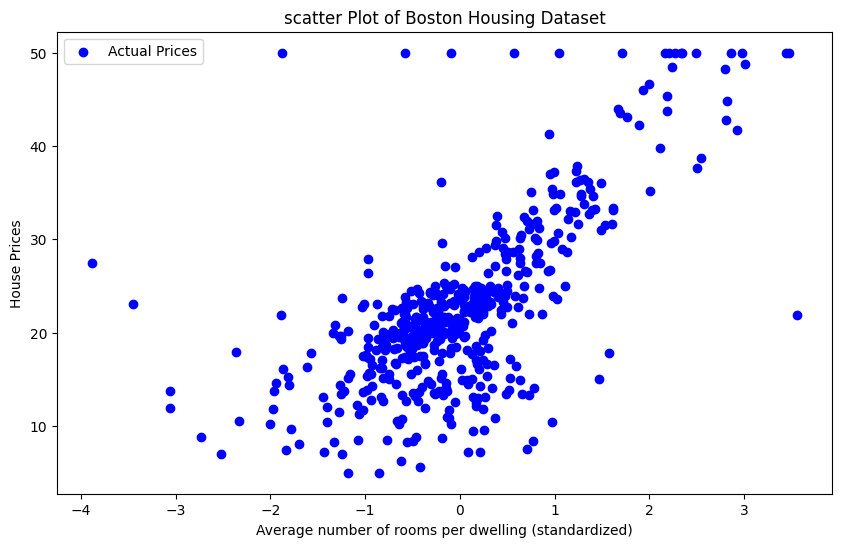

In [ ]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Prices')
plt.xlabel('Average number of rooms per dwelling (standardized)')
plt.ylabel('House Prices')
plt.title('scatter Plot of Boston Housing Dataset')
plt.legend()
plt.show()